# Quantum Algorithms (Intro) in Qiskit (Deutsch's)
A real algorithm, one of the first ever created, will be implemented in Qiskit.

Start by some typical setup and definition of useful functions, which you are encouraged to look at.

Then, head to the [exercises start](#Exercises-Start-Here) to start coding!

![Matrix Oracle](oracle.jpg)

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

In [2]:
# Choose the drawer you like best:
from qiskit.tools.visualization import matplotlib_circuit_drawer as draw
#from qiskit.tools.visualization import circuit_drawer as draw

In [3]:
from qiskit import IBMQ
IBMQ.load_accounts() # make sure you have setup your token locally to use this

In [4]:
%matplotlib inline

## Utils for visualizing experimental results

In [5]:
import matplotlib.pyplot as plt

def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

## Utils for executing circuits

In [6]:
from qiskit import Aer
# See a list of available local simulators
print("Aer backends: ", Aer.backends())

Aer backends:  [<QasmSimulator('qasm_simulator') from Aer()>, <QasmSimulatorPy('qasm_simulator_py') from Aer()>, <StatevectorSimulator('statevector_simulator') from Aer()>, <StatevectorSimulatorPy('statevector_simulator_py') from Aer()>, <UnitarySimulator('unitary_simulator') from Aer()>, <CliffordSimulator('clifford_simulator') from Aer()>]


In [7]:
# see a list of available remote backends (these are freely given by IBM)
print("IBMQ Backends: ", IBMQ.backends())

IBMQ Backends:  [<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx5') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]


### Execute locally

In [8]:
# execute circuit and either display a histogram of the results
def execute_locally(qc, draw_circuit=False, show_results=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    if draw_circuit or show_results: # Print the results
        print("simulation: ", result_sim, result_counts)
    
    if draw_circuit: # draw the circuit
        draw(qc)
    elif show_results: # or show the results
        show_results(result_counts)
    return result_counts

### Execute remotely

In [9]:
from qiskit.backends.ibmq import least_busy
import time
# Compile and run on a real device backend
def execute_remotely(qc, draw_circuit=False, show_results=False):
    if draw_circuit: # draw the circuit
        draw(qc)
    try:
        # select least busy available device and execute.
        least_busy_device = least_busy(IBMQ.backends(simulator=False))
        print("Running on current least busy device: ", least_busy_device)

        # running the job
        job_exp = execute(qc, backend=least_busy_device, shots=1024, max_credits=10)

        lapse, interval = 0, 10
        while job_exp.status().name != 'DONE':
            print('Status @ {} seconds'.format(interval * lapse))
            print(job_exp.status())
            time.sleep(interval)
            lapse += 1
        print(job_exp.status())
        exp_result = job_exp.result()
        result_counts = exp_result.get_counts(qc)

        # Show the results
        print("experiment: ", exp_result, result_counts)
        if show_results: # show the results
            show_results(result_counts)
        return result_counts
    except:
        print("All devices are currently unavailable.")
        return {}

## Building the circuit

In [10]:
def new_circuit(size):
    # Create a Quantum Register with size qubits
    qr = QuantumRegister(size)

    # Create a Classical Register with size bits
    cr = ClassicalRegister(size)

    # Create a Quantum Circuit acting on the qr and cr register
    return qr, cr, QuantumCircuit(qr, cr)

## Our secret Oracles

In [11]:
ERROR_MESSAGE = "Looks like your Deutsch has a bug"

In [12]:
def quantum_oracle_1(qr, cr, circuit):
    pass

In [13]:
def quantum_oracle_2(qr, cr, circuit):
    circuit.cx(qr[0], qr[1])

In [14]:
def quantum_oracle_3(qr, cr, circuit):
    circuit.cx(qr[0], qr[1])
    circuit.cx(qr[1], qr[0])
    circuit.cx(qr[0], qr[1])

In [15]:
def quantum_oracle_4(qr, cr, circuit):
    circuit.z(qr[1])
    circuit.cx(qr[0], qr[1])

---
<h1 align="center">Exercises Start Here</h1>

Make sure you ran all the above cells in order, as the following exercises use functions defined and imported above.

# Understanding Deutsch's Algorithm
If you need go back to the slides, or check other sources, but it is quite important that you get a good grasp on why the algorithm works. Hopefully, these exercises will help achieve that. 

Firstly, let us look at our goal circuit:
![deutsch's circuit](deutsch_algorithm.png)
The XOR symbol is meaningful but not realistic, that is actually a measurement, as you may have guessed!!

## Your Task
I have defined 4 mysterious **oracles:** `quantum_oracle_1` through `quantum_oracle_4`. (For 2 qubits)

You need to find, without looking at their implementation, whether they are **balanced** or **constant** by designing a quantum circuit, just follow the next steps:

**TASK:** Create a new circuit with 2 qubits using `new_circuit` (very useful to reconstruct your circuit in Jupyter)

In [16]:
qr, cr, circuit = new_circuit(2)

**TASK:** Make the necessary modifications on the input qubits (before the Hadamards)

In [17]:
# X gate on qubit 1 (bit flip)
circuit.x(qr[1]);

**TASK:** Implement the Hadamards on both qubits

In [18]:
circuit.h(qr);

**TASK:** Call our oracle 1: `quantum_oracle_1(CLASSICAL_REGISTER, QUANTUM_REGISTER, YOUR_CURRENT_CIRCUIT)`

In [19]:
quantum_oracle_1(qr, cr, circuit)

**TASK:** Implement the Hadamard on qubit 0

In [20]:
circuit.h(qr[0]);

**TASK:** Perform a measurement

In [21]:
# measure the specific qubit
circuit.measure(qr[0], cr[0]);

**TASK:** check the result using `execute_locally` test both `True` and `False` for the `draw_circuit` and `show_results` (4 different combinations) option and save the results!

(This function has been updated and now returns a dictionary like: `{'00': 524, '11': 500}`)

simulation:  COMPLETED {'00': 1024}


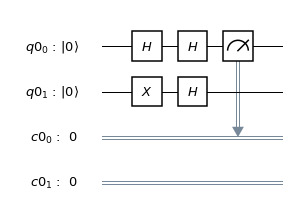

In [22]:
# Try both commands:
# results = execute_locally(circuit, draw_circuit=False, show_results=False) # silent mode
results = execute_locally(circuit, draw_circuit=True, show_results=False)
# results = execute_locally(circuit, draw_circuit=False, show_results=True)
# results = execute_locally(circuit, draw_circuit=True, show_results=True) # this will be the same as True, False

**TASK:** Now implement a decision mechanism that will print either `"CONSTANT"` or `"BALANCED"`, according to what type of oracle `quantum_oracle_1` is!

In [23]:
if '00' in results:
    print("CONSTANT")
elif '10' in results:
    print("BALANCED")

CONSTANT


**TASK:** Take your code and isolate it into a function `get_deutsch_verdict` that has a dictionary with the execution results and returns either `"CONSTANT"` or `"BALANCED"`, accordingly.

In [24]:
def get_deutsch_verdict(res): # should be improved for error handling
    if '00' in res:
        return "CONSTANT"
    elif '01' in res:
        return "BALANCED"

**TASK:** Call your function with your previous results and print its return value:

In [25]:
print(get_deutsch_verdict(results))

CONSTANT


## Isolate your code into a function
**TASK:** Create a function called `deutsch` which receives a `black_box` as an argument and returns either `"CONSTANT"` or `"BALANCED"` (a stub has already been created for you)

In [26]:
def deutsch(black_box):
    qr, cr, circuit = new_circuit(2)
    circuit.x(qr[1]) # X gate on qubit 1 (bit flip)
    circuit.h(qr) # Hadamard on both qubits
    
    black_box(qr, cr, circuit)
    
    circuit.h(qr[0]) # Hadamard on interesting qubit
    circuit.measure(qr[0], cr[0]) # measure the specific qubit
    
    results = execute_locally(circuit, draw_circuit=False, show_results=False) # silent mode
    return get_deutsch_verdict(results)

**TASK:** Call `deutsch(quantum_oracle_1)` and a `'CONSTANT'` value should appear:

In [27]:
deutsch(quantum_oracle_1)

'CONSTANT'

**TASK:** Now that you are confident of your implementation, call it for the following cases to make sure it is! If you have a bug an `AssertionError` will appear

Test case 1: `quantum_oracle_1`

In [28]:
assert deutsch(quantum_oracle_1) == 'CONSTANT', ERROR_MESSAGE

Test case 2: `quantum_oracle_2`

In [29]:
assert deutsch(quantum_oracle_2) == 'BALANCED', "Looks like your Deutsch has a bug"

Test case 3: `quantum_oracle_3`

In [30]:
assert deutsch(quantum_oracle_3) == 'BALANCED', "Looks like your Deutsch has a bug"

Test case 4: `quantum_oracle_4`

In [31]:
assert deutsch(quantum_oracle_4) == 'CONSTANT', "Looks like your Deutsch has a bug"

## Free Flow
On your own, try to implement `deutsch_jozsa` which is able to handle multiple qubits (this can your homework for the week!). 